<h1>Import thư viện</h1>


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h1>Đọc file csv</h1>


In [2]:
data = pd.read_csv("./pima-indians-diabetes.data.csv")
column_names = [
    'pregnancies', 'glucose', 'blood_pressure', 'skin_thickness', 
    'insulin', 'bmi', 'dpf', 'age', 'outcome'
]
data.columns = column_names
pd.set_option("display.width", 200)
print(data.head(5))

   pregnancies  glucose  blood_pressure  skin_thickness  insulin   bmi    dpf  age  outcome
0            1       85              66              29        0  26.6  0.351   31        0
1            8      183              64               0        0  23.3  0.672   32        1
2            1       89              66              23       94  28.1  0.167   21        0
3            0      137              40              35      168  43.1  2.288   33        1
4            5      116              74               0        0  25.6  0.201   30        0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   pregnancies     767 non-null    int64  
 1   glucose         767 non-null    int64  
 2   blood_pressure  767 non-null    int64  
 3   skin_thickness  767 non-null    int64  
 4   insulin         767 non-null    int64  
 5   bmi             767 non-null    float64
 6   dpf             767 non-null    float64
 7   age             767 non-null    int64  
 8   outcome         767 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
data.isna().sum()

pregnancies       0
glucose           0
blood_pressure    0
skin_thickness    0
insulin           0
bmi               0
dpf               0
age               0
outcome           0
dtype: int64

<h1>Vẽ Histogram cho các thuộc tính</h1>


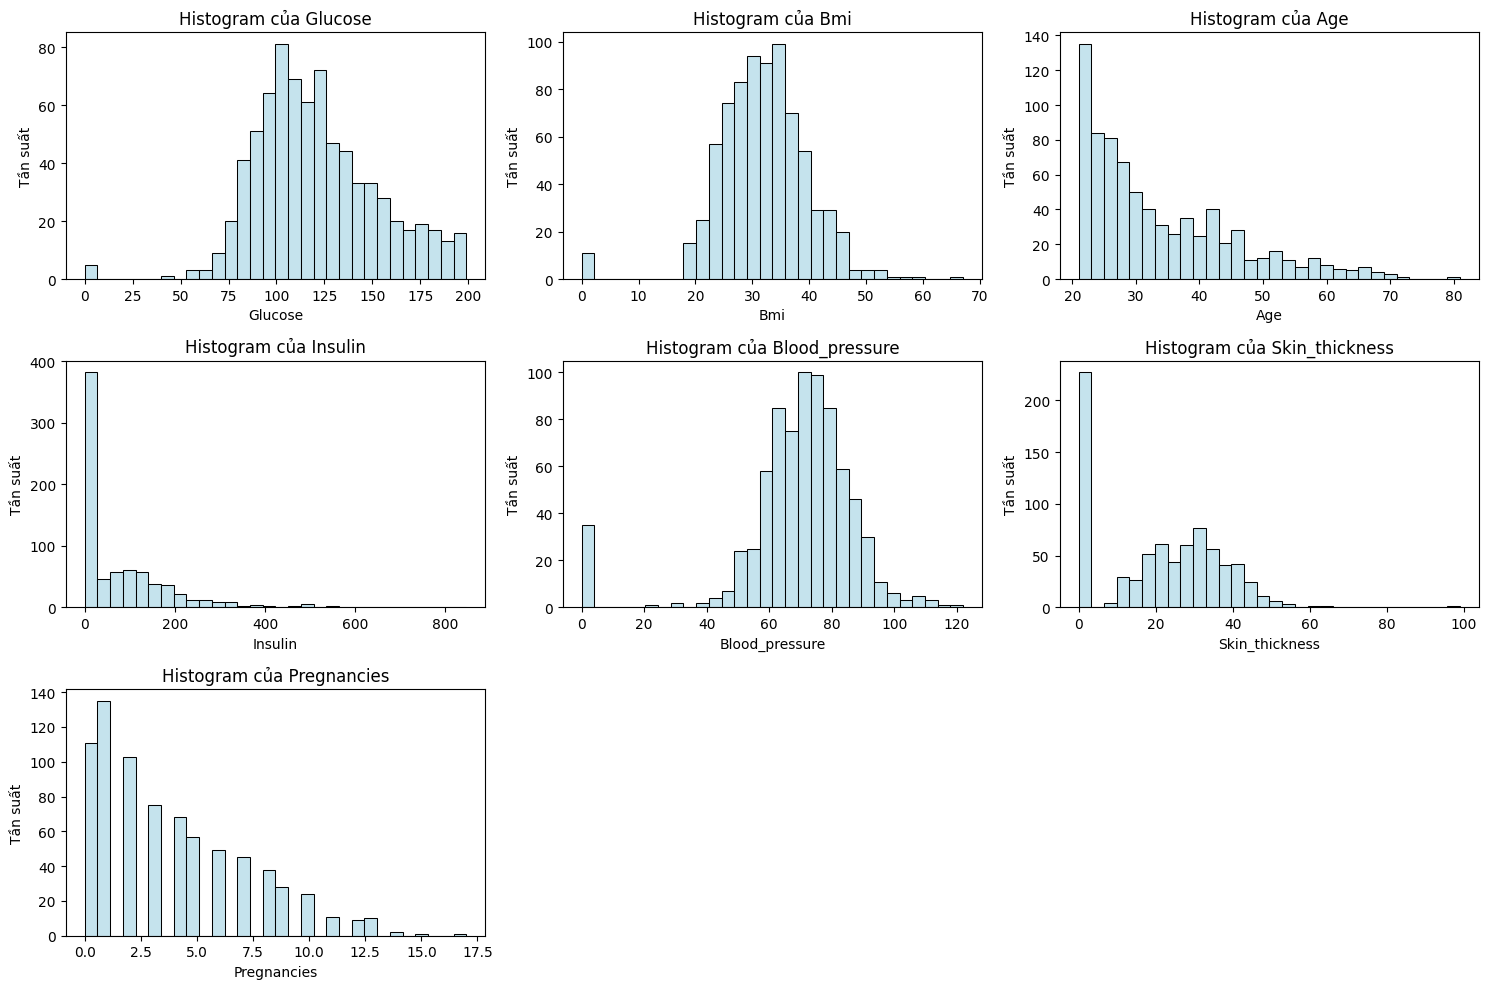

In [5]:
# Danh sách các biến số cần vẽ
variables = ['glucose', 'bmi', 'age', 'insulin', 'blood_pressure', 'skin_thickness', 'pregnancies']
# Tạo khung chứa các histogram
plt.figure(figsize=(15, 10))
# Tạo vòng lập for cho các biến tên và bắt đầu từ 1
for i, var in enumerate(variables, 1):
    # Tạo subplot cho trong lưới 3x3 tại vị trí i
    plt.subplot(3, 3, i)
    # Vẽ histogram cho biến var: data[var] - dữ liệu từ data; bins = 30 - chia làm 30 nhóm
    sns.histplot(data[var], bins=30, alpha=0.7, color='lightblue')
    # Đặt tên cho từng histogram: var.capitalize() - tên cột
    plt.title(f'Histogram của {var.capitalize()}')
    plt.xlabel(var.capitalize())
    plt.ylabel('Tần suất')
# Tự động điều chỉnh khoảng cách giữa các histogram
plt.tight_layout()
# Lưu ảnh lại
plt.savefig("./pictures/histogram.png")
plt.show()

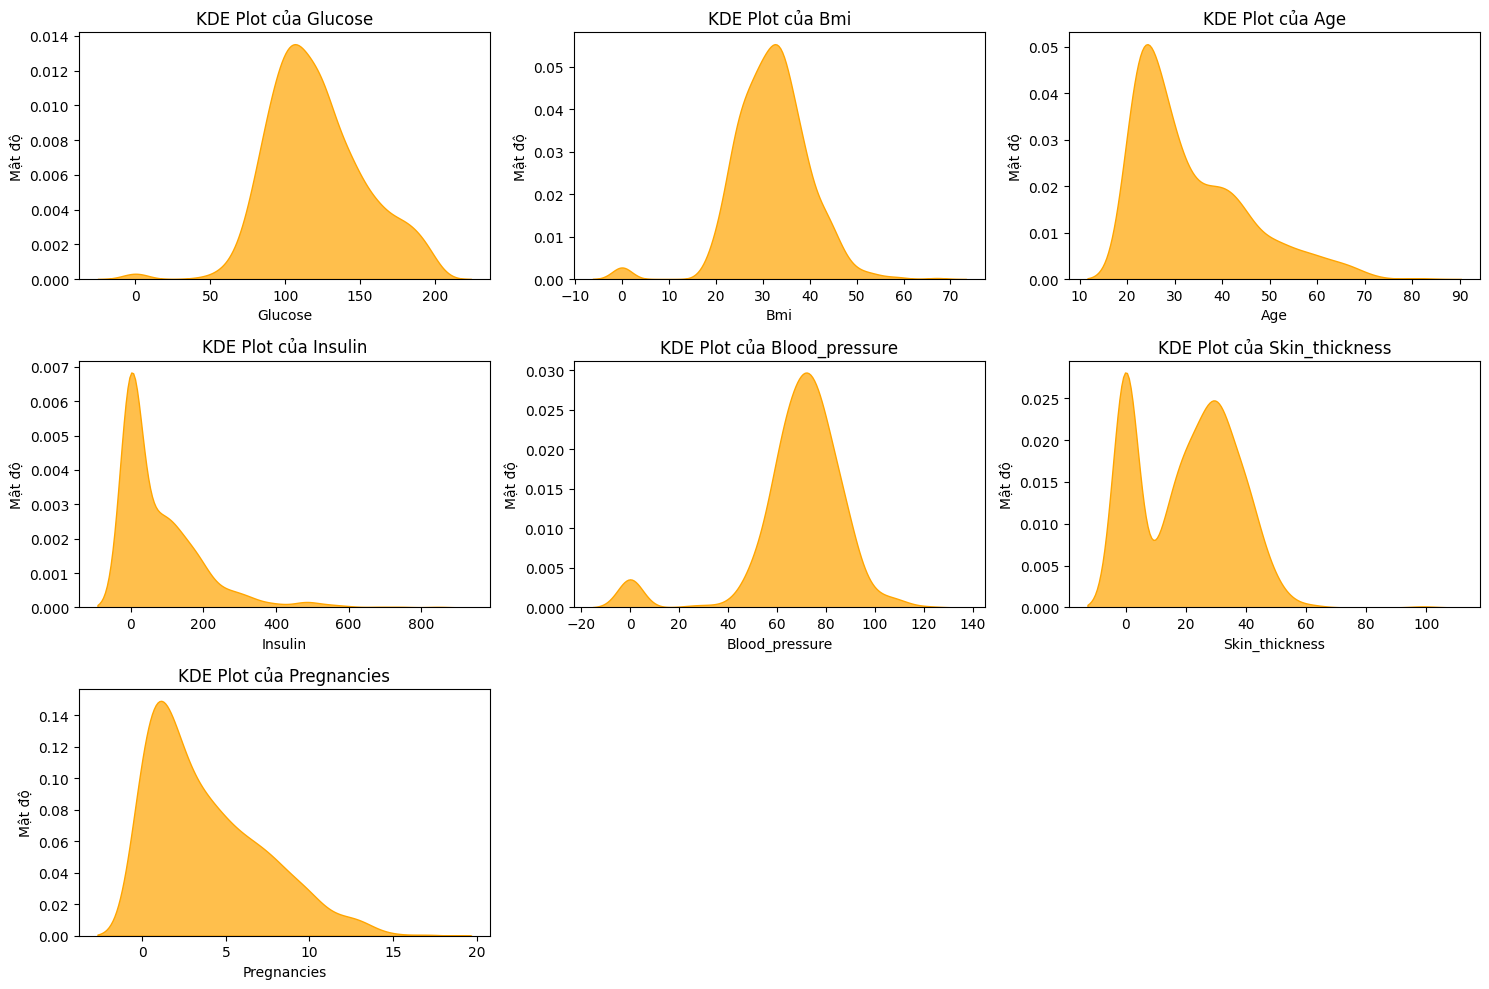

In [6]:
plt.figure(figsize=(15, 10))
for i, var in enumerate(variables, 1):
    plt.subplot(3, 3, i)
    sns.kdeplot(data[var], fill=True, alpha=0.7, color='orange')
    plt.title(f'KDE Plot của {var.capitalize()}')
    plt.xlabel(var.capitalize())
    plt.ylabel('Mật độ')
plt.tight_layout()
plt.savefig("./pictures/KDE_plot.png")
plt.show()

In [7]:
print((data['bmi'] < 0).sum())

0


<h1>Box plot</h1>


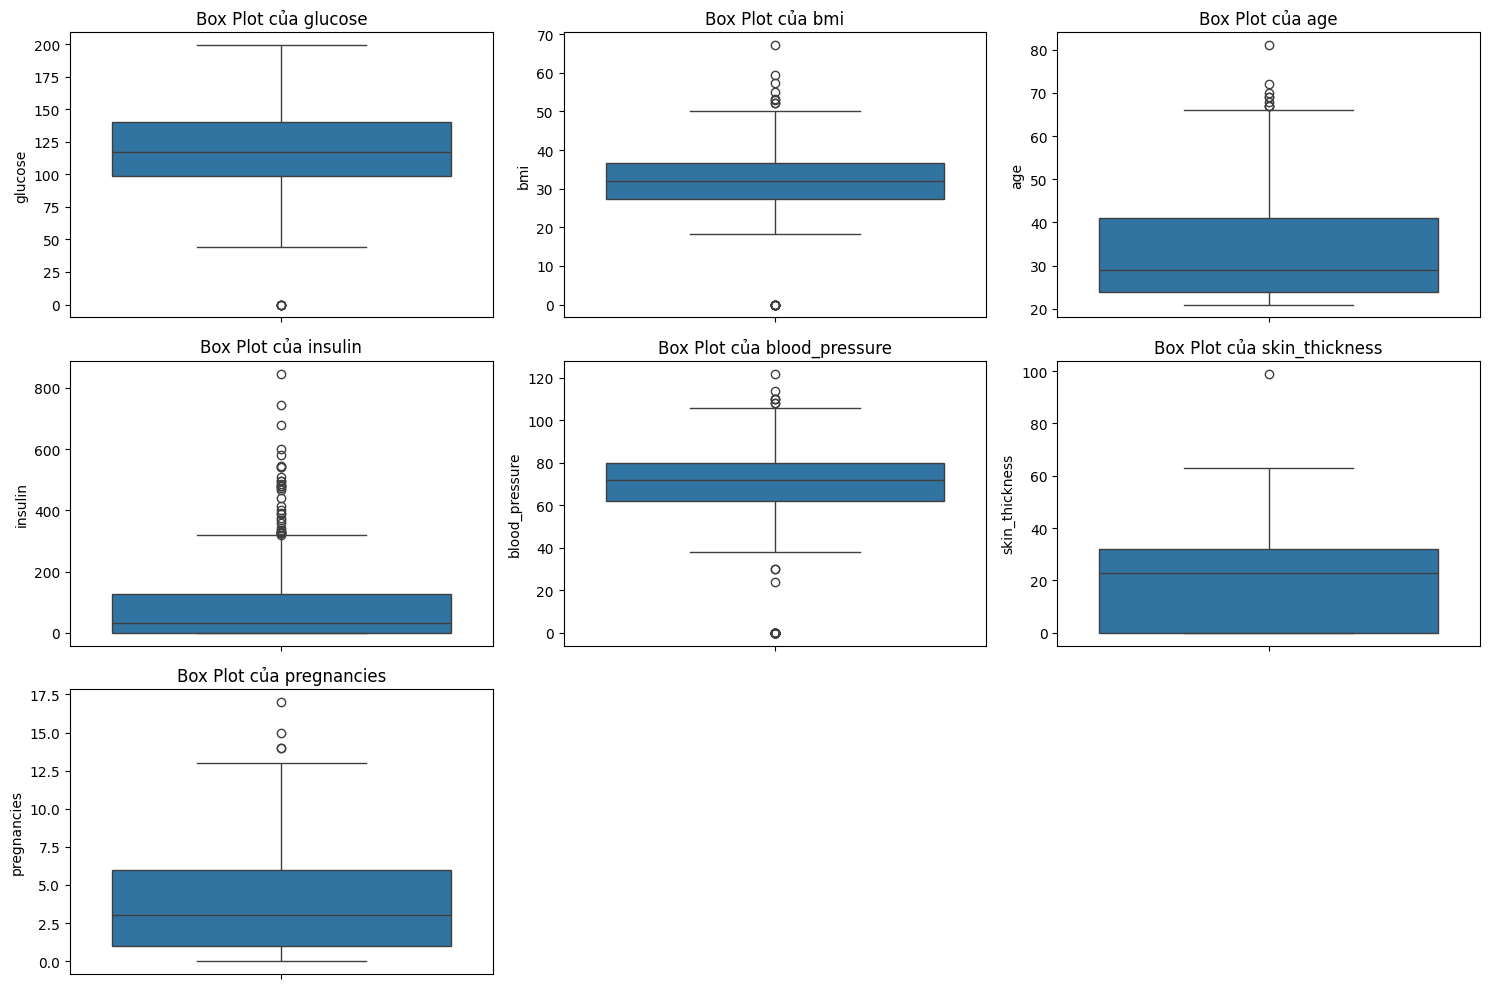

In [8]:
# Vẽ box plot cho từng biến số
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
axes = axes.ravel() # Để biến mảng 2 chiều thành 1 chiều, dễ duyệt

for i, col in enumerate(variables):
    sns.boxplot(y=data[col], ax=axes[i])
    axes[i].set_title(f'Box Plot của {col}')
# Ẩn 2 ô cuối cùng ko vẽ
axes[7].set_visible(False)
axes[8].set_visible(False)
plt.tight_layout()
plt.savefig("./pictures/box_plots.png")
plt.show()

<h1>Count Plot</h1>


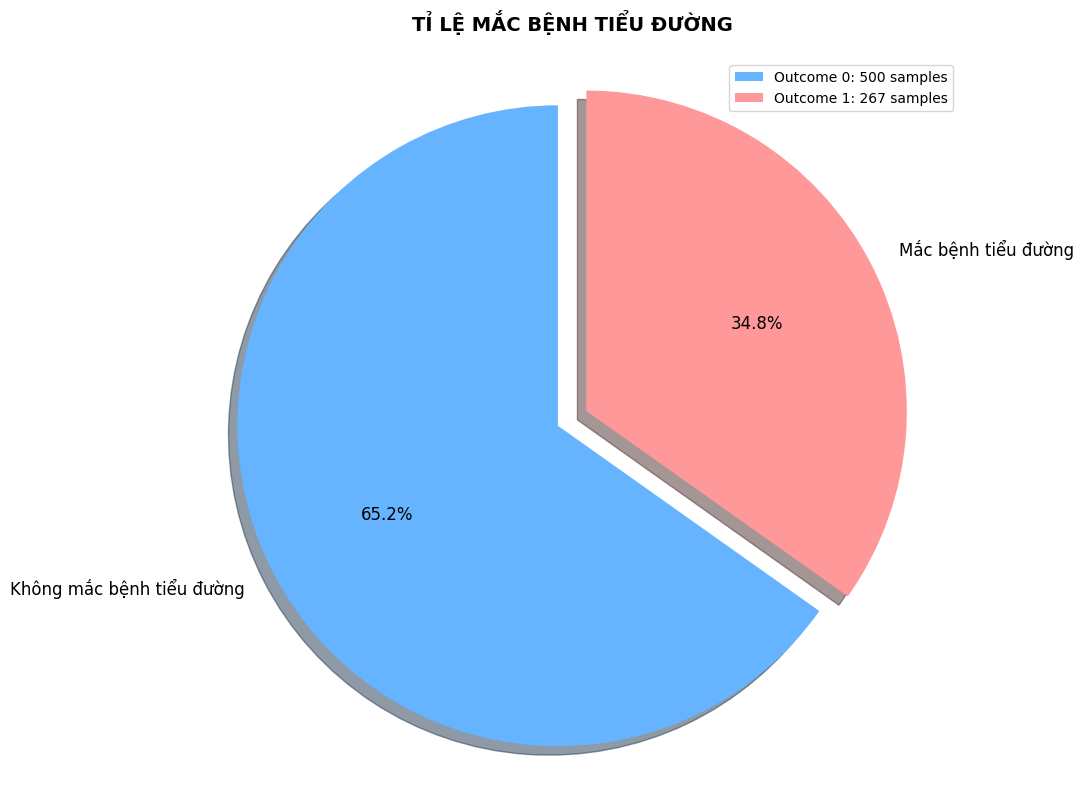

In [9]:
# counts = data['class'].value_counts()
# counts.plot.pie(autopct='%1.1f%%', labels=['Không mắc bệnh tiểu đường', 'Mắc bệnh tiểu đường'], startangle=90, colors=['lightcoral', 'lightskyblue'])
# plt.title('Tỉ lệ mắc bệnh tiểu đường')
# plt.ylabel('')  # Ẩn nhãn trục y
# plt.show()

plt.figure(figsize=(10, 8))

counts = data['outcome'].value_counts()
colors = ['#66b3ff', '#ff9999'] 
explode = (0.05, 0.05)  # Tách nhẹ các phần

plt.pie(counts.values, 
        labels=['Không mắc bệnh tiểu đường', 'Mắc bệnh tiểu đường'], 
        autopct='%1.1f%%', 
        startangle=90,
        colors=colors,
        explode=explode,
        shadow=True,  # Thêm bóng đổ
        textprops={'fontsize': 12})

plt.title('TỈ LỆ MẮC BỆNH TIỂU ĐƯỜNG', 
          fontsize=14, fontweight='bold', pad=20)
plt.axis('equal')  # Đảm bảo hình tròn hoàn hảo

# Thêm chú thích số lượng cụ thể
plt.legend([f'Outcome {i}: {count} samples' for i, count in counts.items()],
           loc='best')

plt.tight_layout()
plt.savefig("./pictures/pie_chart_class.png", bbox_inches='tight')
plt.show()

In [10]:
data.corr()

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,dpf,age,outcome
pregnancies,1.000000,0.128846,0.141197,-0.082495,-0.072999,0.017518,-0.033927,0.544018,0.221087
glucose,0.128846,1.000000,0.152498,0.056381,0.332383,0.220955,0.136903,0.262408,0.465856
blood_pressure,0.141197,0.152498,1.000000,0.207308,0.089098,0.281777,0.041180,0.239571,0.064882
skin_thickness,-0.082495,0.056381,0.207308,1.000000,0.437974,0.392553,0.183498,-0.115873,0.073265
insulin,-0.072999,0.332383,0.089098,0.437974,1.000000,0.198111,0.185579,-0.040942,0.131984
bmi,0.017518,0.220955,0.281777,0.392553,0.198111,1.000000,0.140546,0.035911,0.292695
dpf,-0.033927,0.136903,0.041180,0.183498,0.185579,0.140546,1.000000,0.032738,0.173245
age,0.544018,0.262408,0.239571,-0.115873,-0.040942,0.035911,0.032738,1.000000,0.236417
outcome,0.221087,0.465856,0.064882,0.073265,0.131984,0.292695,0.173245,0.236417,1.000000


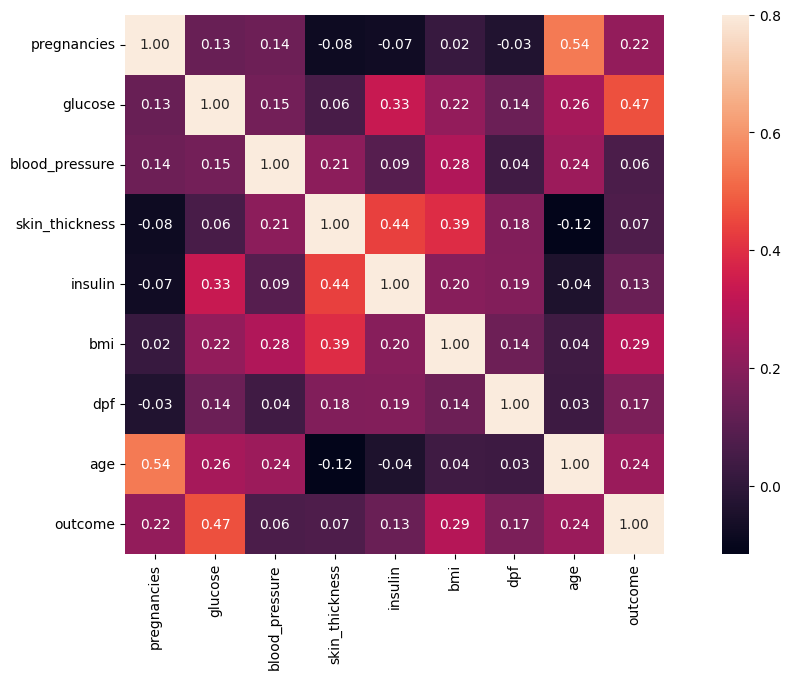

In [11]:
corrmat = data.corr()
f, ax = plt.subplots(figsize = (15,7))
# sns.heatmap(corrmat, annot=True, fmt=".2f", annot_kws={'size': 10}, vmax = .8, square=True)
sns.heatmap(corrmat, 
           annot=True,      # Hiển thị giá trị số trong ô
           fmt=".2f",       # Định dạng số (2 chữ số thập phân)
           annot_kws={'size': 10},  # Cỡ chữ của giá trị
           vmax=.8,         # Giới hạn max màu sắc (0.8)
           square=True)     # Ô vuông đều
plt.savefig("./pictures/correlation_heat_map.png")
plt.show()